In [1]:
from plot_helper import xaxis_label_ticker
from constants import ANNOTATION_X_LOCATION
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
xlocator = 5*365
ticks_x = xaxis_label_ticker()
import pandas as pd
import os
from constants import HEADER_NAME, \
  ENCODINGDB, ENCODING_TO_MN_DICT, \
  REPORTDAYS, FIRST_ROW_AFTER_BURNIN

In [2]:
plt.rcParams['figure.figsize'] = [20, 12]
rc = {"font.family" : "sans-serif", 
      "font.style" : "normal",
      "mathtext.fontset" : "dejavusans"}
plt.rcParams.update(rc)
plt.rcParams["font.sans-serif"] = ["Myriad Pro"] + plt.rcParams["font.sans-serif"]

In [3]:
def fig_e_plot_one_strategy(ax, fpath, label, color):
  from constants import REPORTDAYS
  import numpy as np
  bsp_100runs = []
  for i in range(1,101):
    df = pd.read_csv(
      os.path.join(fpath, f'monthly/{i}.txt'),
      index_col=False,
      names=HEADER_NAME,
      sep='\t'
    ).fillna(0)
    assert df.shape == (361, 283)
    bsp_100runs.append(df['bsp_2_10'])
  ax.plot(REPORTDAYS, np.median(bsp_100runs, axis=0), label=label, color=color)
  ax.fill_between(
    REPORTDAYS,
    np.percentile(bsp_100runs, 25, axis=0),
    np.percentile(bsp_100runs, 75, axis=0),
    color=color, alpha=0.25
  )
  ax.fill_between(
    REPORTDAYS,
    np.percentile(bsp_100runs, 2.5, axis=0),
    np.percentile(bsp_100runs, 97.5, axis=0),
    color=color, alpha=0.1
  )

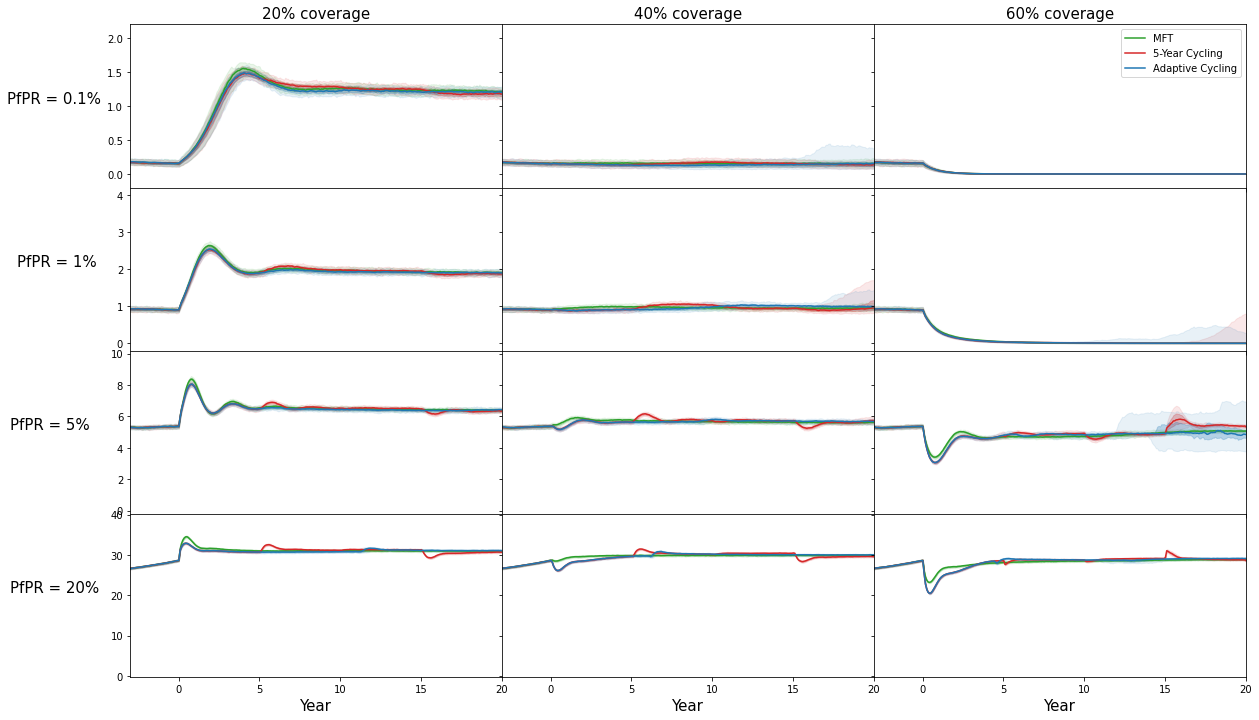

In [4]:
from constants import XLABEL_FONTSIZE, YLABEL_PADDING
XLABEL_FONTSIZE = XLABEL_FONTSIZE-5
fdir_path = 'simulation_outputs/set7'
savepath = 'saved_figures/FigE_v1.svg'
fig, axes = plt.subplots(4, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), \
  (ax10, ax11, ax12) = axes
fig.patch.set_facecolor('white')

for rownum in range(4):
  if rownum == 0:
    for idx, covtext in enumerate([20,40,60]):
      axes[0][idx].set_title(f'{covtext}% coverage', fontsize=XLABEL_FONTSIZE)
  for (a,idx) in zip([1+rownum,5+rownum,9+rownum],[0,1,2]): # setnum, indexnum
    fdir_path = f'simulation_outputs/set{a}'
    fig_e_plot_one_strategy(axes[rownum][idx], fdir_path+'_m/', 'MFT', 'tab:green')
    fig_e_plot_one_strategy(axes[rownum][idx], fdir_path+'_c/', '5-Year Cycling', 'tab:red')
    fig_e_plot_one_strategy(axes[rownum][idx], fdir_path+'_ac/', 'Adaptive Cycling', 'tab:blue')
  
for ax in axes[3]:
  ax.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
  ax.xaxis.set_major_formatter(ticks_x)
  ax.set_xlabel('Year', fontsize=XLABEL_FONTSIZE)
for temp in range(4):
  axes[temp][0].set_ylabel('PfPR')

axes[0][0].set_ylabel('PfPR = 0.1%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[1][0].set_ylabel('PfPR = 1%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[2][0].set_ylabel('PfPR = 5%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[3][0].set_ylabel('PfPR = 20%', multialignment='left', 
                     horizontalalignment='left', rotation=0, 
                     fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
axes[0][2].legend()

for ax in axes[0]:
  ax.set_ylim(-0.2, 2.2)
for ax in axes[1]:
  ax.set_ylim(-0.2, 4.2)
for ax in axes[2]:
  ax.set_ylim(-0.2, 10.2)
for ax in axes[3]:
  ax.set_ylim(-0.2, 40.2)
for i in range(4):
  for ax in axes[i]:
    ax.set_xlim(7*365, REPORTDAYS[-1])

plt.savefig(fname=savepath, format='svg', bbox_inches='tight')